In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

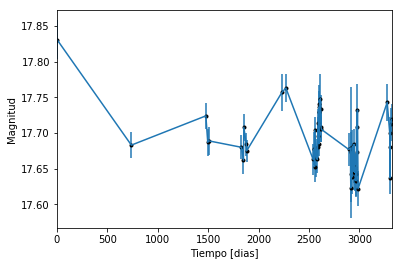

In [3]:
data = np.genfromtxt('LC_2670_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

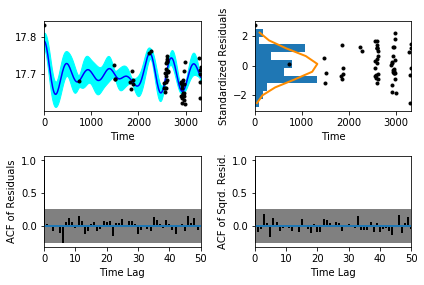

In [6]:
sample.assess_fit()

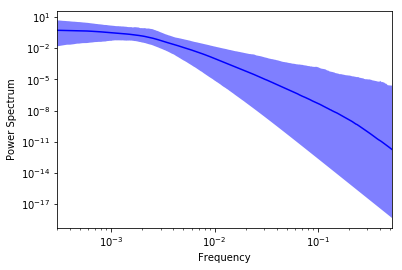

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0519174,'Medida del nivel de ruido')

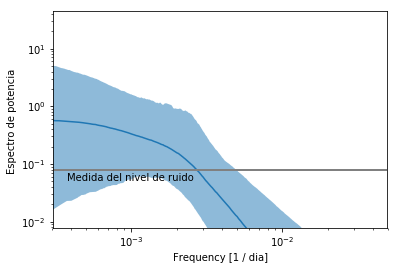

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

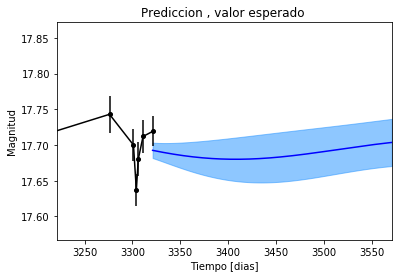

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

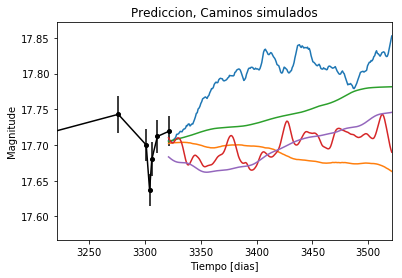

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


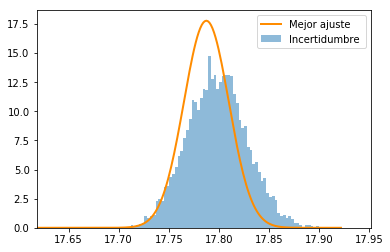

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

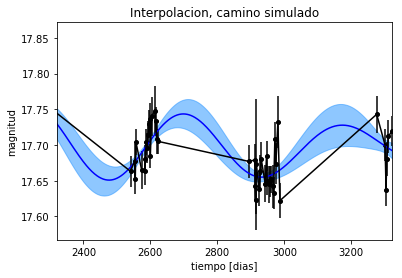

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

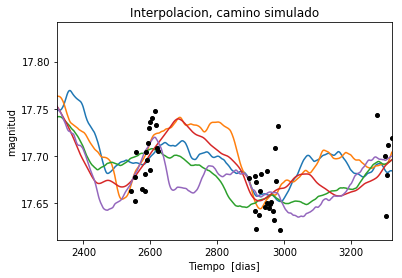

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


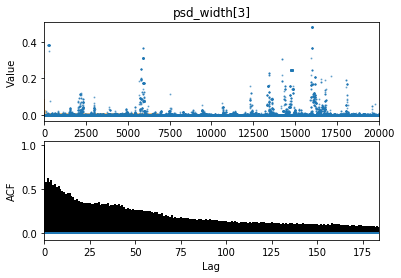

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 800.143913381
Median: 0.00730914377007
Standard deviation: 0.177493377012
68% credibility interval: [ 0.00074838  0.12909523]
95% credibility interval: [  3.37375295e-04   7.11470813e-01]
99% credibility interval: [  3.06543779e-04   9.58677147e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1027.08045317
Median: 0.00254649891725
Standard deviation: 0.0741465404859
68% credibility interval: [ 0.00057349  0.02619726]
95% credibility interval: [ 0.00032771  0.2265428 ]
99% credibility interval: [  3.05328154e-04   5.59211939e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 318.952377188
Median: 0.0160473826189
Standard

In [19]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 744.172375306
Median: 0.024465963997
Standard deviation: 0.265688088611
68% credibility interval: [ 0.          0.43377986]
95% credibility interval: [ 0.          0.90487734]
99% credibility interval: [ 0.          1.00801832]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 744.172375306
Median: 0.024465963997
Standard deviation: 0.265688088611
68% credibility interval: [ 0.          0.43377986]
95% credibility interval: [ 0.          0.90487734]
99% credibility interval: [ 0.          1.00801832]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 618.086566348
Median: 0.0
Standard deviation: 0.000940993853382
68% cred

Plotting parameter summary


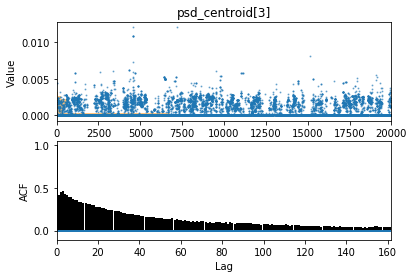

In [21]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [22]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [23]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1998.08590147
Median: 137.892281261
Standard deviation: 1.68733969474
68% credibility interval: [ 136.10956896  139.06688533]
95% credibility interval: [ 133.59048109  140.39235953]
99% credibility interval: [ 131.39783347  140.8829173 ]


In [24]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [25]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 723.277239977
Median: 0.534100960107
Standard deviation: 2.20721328002
68% credibility interval: [ 0.05159323  4.04380091]
95% credibility interval: [ 0.01367512  7.13574055]
99% credibility interval: [  9.62571663e-03   1.04442769e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 812.820847846
Median: 0.589305809483
Standard deviation: 9.59963785559
68% credibility interval: [  0.01532528  10.69670117]
95% credibility interval: [  7

Plotting parameter summary


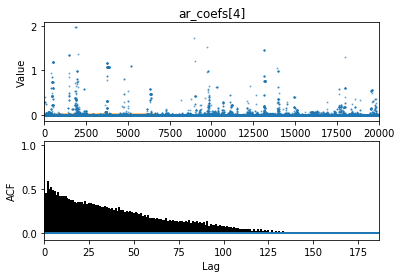

In [26]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [27]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [28]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5533.3265567
Median: 7.62650836758e-51
Standard deviation: 8.00272056314e+58
68% credibility interval: [  6.04002721e-120   5.31987229e-010]
95% credibility interval: [  1.65293841e-152   1.58610838e+046]
99% credibility interval: [  6.69848782e-196   5.82718013e+054]


In [29]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2430.81425271
Median: 17.7090504802
Standard deviation: 0.0237986210177
68% credibility interval: [ 17.69194898  17.7299841 ]
95% credibility interval: [ 17.66872468  17.76334497]
99% credibility interval: [ 17.64830866  17.80209315]


Plotting parameter summary


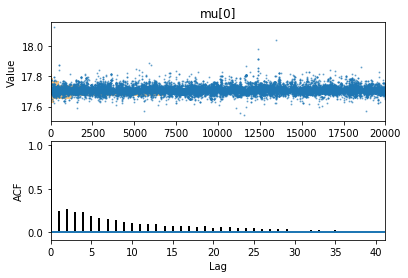

In [31]:
sample.plot_parameter('mu', 0, doShow=True)

In [32]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [33]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 744.172375306
Median: 0.024465963997
Standard deviation: 0.265688088611
68% credibility interval: [ 0.          0.43377986]
95% credibility interval: [ 0.          0.90487734]
99% credibility interval: [ 0.          1.00801832]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 744.172375306
Median: 0.024465963997
Standard deviation: 0.265688088611
68% credibility interval: [ 0.          0.43377986]
95% credibility interval: [ 0.          0.90487734]
99% credibility interval: [ 0.          1.00801832]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 618.086566348
Median: 0.0
Standard deviation: 0.000940993853382
68% cred

Plotting parameter summary


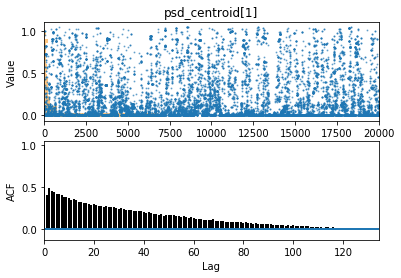

In [34]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [35]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1998.08590147
Median: 137.892281261
Standard deviation: 1.68733969474
68% credibility interval: [ 136.10956896  139.06688533]
95% credibility interval: [ 133.59048109  140.39235953]
99% credibility interval: [ 131.39783347  140.8829173 ]


Plotting parameter summary


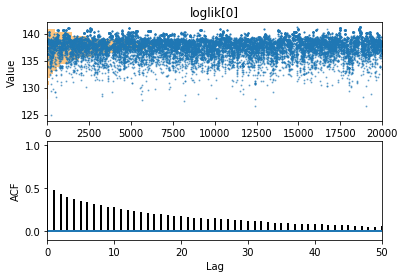

In [37]:
sample.plot_parameter('loglik', 0, doShow=True)

In [38]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [39]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2009.82107338
Median: 0.00234570489796
Standard deviation: 0.00340148858321
68% credibility interval: [ 0.0012641   0.00464097]
95% credibility interval: [ 0.00073407  0.01040345]
99% credibility interval: [ 0.00050914  0.01964883]


Plotting parameter summary


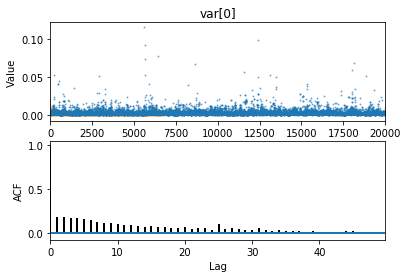

In [40]:
sample.plot_parameter('var', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1774.3306852
Median: 1.12866523022
Standard deviation: 0.178962892352
68% credibility interval: [ 0.97046493  1.31655252]
95% credibility interval: [ 0.84057614  1.54500335]
99% credibility interval: [ 0.72685792  1.70274372]


Plotting parameter summary


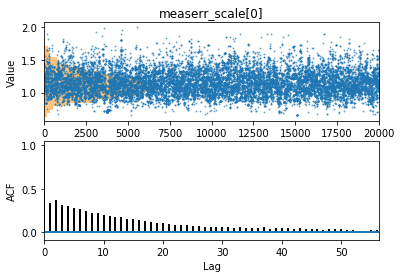

In [44]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [46]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 474.314241896
Median: 8.49890792829e-05
Standard deviation: 0.0833040477313
68% credibility interval: [  3.92315431e-07   4.29538492e-03]
95% credibility interval: [  5.85527140e-51   1.72192934e-01]
99% credibility interval: [  9.18170844e-60   6.03549632e-01]


Plotting parameter summary


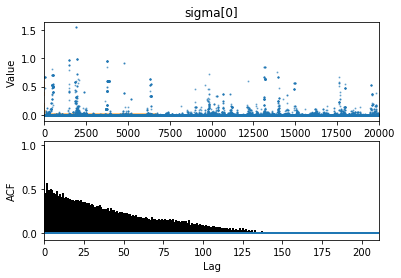

In [47]:
sample.plot_parameter('sigma', 0, doShow=True)

In [48]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [49]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 800.143913381
Median: (-0.0459247047442-5.59053702299j)
Standard deviation: 2.00761348583
68% credibility interval: [-0.81112926+0.j         -0.00470219-0.01230427j]
95% credibility interval: [ -4.47030296e+00+0.j          -2.11979150e-03-0.05421008j]
99% credibility interval: [ -6.02354616e+00+0.j          -1.92607137e-03-5.14081051j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1027.08045317
Median: (-0.0160001245816+0.0207307783793j)
Standard deviation: 1.73315570633
68% credibility interval: [-0.16460225+0.j         -0.00360336+0.00397751j]
95% credibility interval: [-1.42341037+5.58194816j -0.00205909+0.1594231j ]
99% credibility interval: [ -3.51363224e+00 +3.75419935e+00j  -1.91843337e-03 +5.34785711e-05j]
Po